In [1]:
# Installo la libreria gdown per poter scaricare il dataset
!pip install gdown==4.6.0
!pip install -U torch torchvision
import gdown
import tarfile
import os

# URL diretto al file .tar.gz su Google Drive
file_id = '1mDmmw2h25ci1AvHqh2rQLJrK5npJDlo6'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
# Percorso di destinazione per il download e l'estrazione
download_path = '/content/dataset'
os.makedirs(download_path, exist_ok=True)

# Scarico il file .tar.gz
output_file = os.path.join(download_path, 'dataset.tar.gz')
gdown.download(url, output_file, quiet=False)

# Estraggo il contenuto del file .tar.gz
with tarfile.open(output_file, 'r:gz') as tar_ref:
    tar_ref.extractall(download_path)

# Lista il contenuto della cartella
print(os.listdir(download_path))

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Downloading...
From: https://drive.google.com/uc?id=1mDmmw2h25ci1AvHqh2rQLJrK5npJDlo6&export=download
To: /content/dataset/dataset.tar.gz
100%|██████████| 291M/291M [00:05<00:00, 51.4MB/s]


['dataset.tar.gz', 'trainingset', 'testset']


Modifico il mio file json in particolare aggiungo una chiave che specifica che sono immaginini del train o del validation

In [2]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision
from sklearn.model_selection import train_test_split
import shutil
import json
import os
import json
import shutil
from sklearn.model_selection import train_test_split

dataset_folder = '/content/dataset/trainingset/'
training_folder = '/content/dataset/trainingset/'
validation_folder = '/content/dataset/validationset/'

all_files = [filename for filename in os.listdir(dataset_folder) if filename != 'train.json']
train_files, val_files = train_test_split(all_files, test_size=0.2, random_state=1)
os.makedirs(training_folder, exist_ok=True)
os.makedirs(validation_folder, exist_ok=True)

# Sposta i file nelle rispettive cartelle
for filename in train_files:
    src_path = os.path.join(dataset_folder, filename)
    dest_path = os.path.join(training_folder, filename)
    shutil.move(src_path, dest_path)

for filename in val_files:
    src_path = os.path.join(dataset_folder, filename)
    dest_path = os.path.join(validation_folder, filename)
    shutil.move(src_path, dest_path)

# Aggiungo la chiave "set" al tuo file JSON in base alla suddivisione
annotations_path = '/content/dataset/trainingset/train.json'
val_annotations_path = '/content/dataset/validationset/val.json'
train_annotations_path = "/content/dataset/trainingset/tra.json"


with open(annotations_path, 'r') as json_file:
    data = json.load(json_file)

# Aggiungi la chiave "set" a ciascun elemento nella lista "images"
for image in data['images']:
    # Esempio: assegna il set in base al nome del file (puoi personalizzare questa logica)
    if image['file_name'] in train_files:
        image['set'] = 'train'
    elif image['file_name'] in val_files:
        image['set'] = 'val'
    else:
        image['set'] = 'other'

# Salva il file JSON aggiornato
with open(annotations_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)




Divido il file .json

In [3]:


# Crea il file val.json
if not os.path.exists(val_annotations_path):
    with open(val_annotations_path, 'w') as val_json_file:
        json.dump({'images': [], 'annotations': []}, val_json_file)
# Crea il file tra.json
if not os.path.exists(train_annotations_path):
    with open(train_annotations_path, 'w') as train_json_file:
        json.dump({'images': [], 'annotations': []}, train_json_file)

# Apro il file JSON originale
with open(annotations_path, 'r') as json_file:
    data = json.load(json_file)

# Filtra e salva il file JSON di addestramento
train_data = {'images': [img for img in data['images'] if img['set'] == 'train'], 'annotations': []}
with open(train_annotations_path, 'w') as json_file:
    json.dump(train_data, json_file, indent=4)

# Filtra e salva il file JSON di convalida
val_data = {'images': [img for img in data['images'] if img['set'] == 'val'], 'annotations': []}
with open(val_annotations_path, 'w') as val_json_file:
    json.dump(val_data, val_json_file, indent=4)

# Copia le informazioni di bounding box e segmentazione nei nuovi file JSON
for new_annotations_path, set_key in zip([train_annotations_path, val_annotations_path], ['train', 'val']):
    with open(new_annotations_path, 'r') as new_json_file:
        new_data = json.load(new_json_file)

    # Copia le informazioni di bounding box e segmentazione per ciascuna immagine
    new_data['annotations'] = [ann for ann in data['annotations'] if ann['image_id'] in [img['id'] for img in new_data['images']]]
    new_data['categories'] = data.get('categories', [])

    # Sovrascrivo il file JSON con le nuove informazioni
    with open(new_annotations_path, 'w') as new_json_file:
        json.dump(new_data, new_json_file, indent=4)



Funzione per stampare le immagini

Training Set:


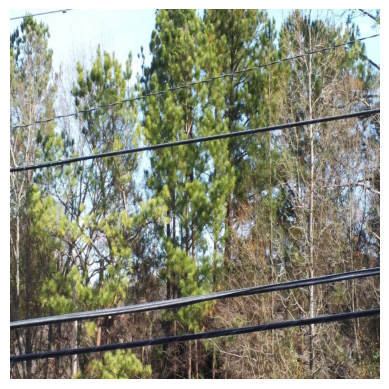

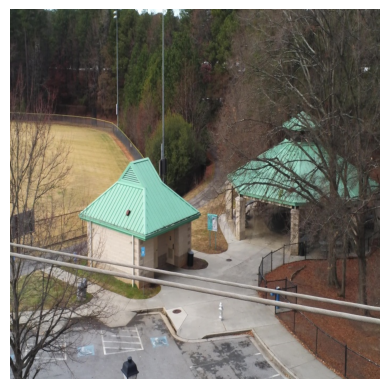

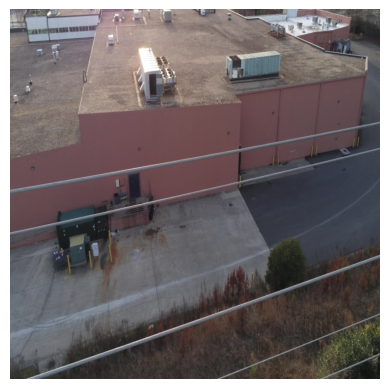

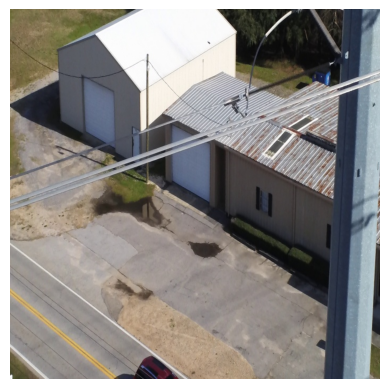

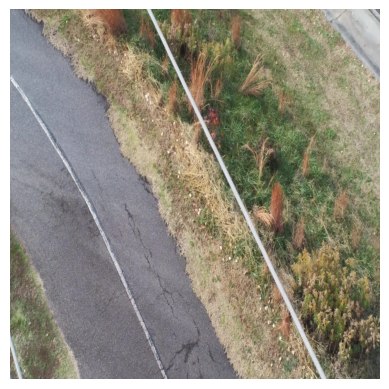

Validation Set:


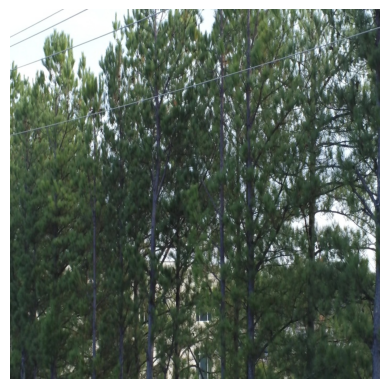

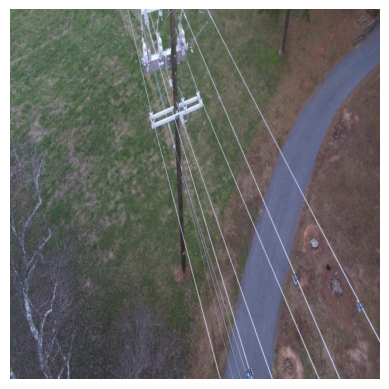

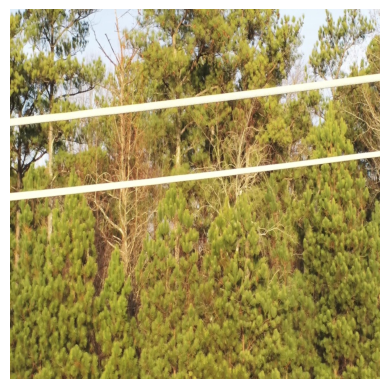

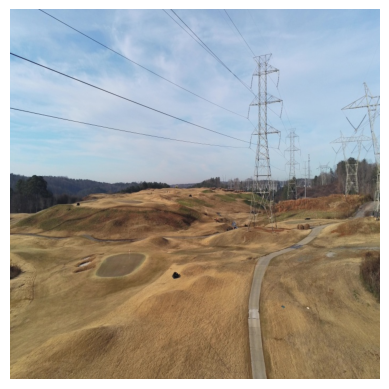

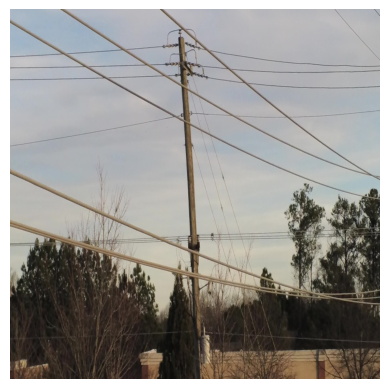

673
169


In [4]:
# Funzione per visualizzare le immagini
def display_images(image_folder, image_files, num_images=5):
    for i in range(min(num_images, len(image_files))):
        filename = image_files[i]
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        # Visualizza l'immagine
        plt.imshow(image)
        plt.axis('off')  # Rimuovi gli assi
        plt.show()

# Visualizza le prime 5 immagini nel set di addestramento
print("Training Set:")
display_images(training_folder, train_files, num_images=5)
# Visualizza le prime 5 immagini nel set di convalida
print("Validation Set:")
display_images(validation_folder, val_files, num_images=5)

# Configuro il transform per l'arricchimento del dataset con PyTorch è giusto una prova
transform = transforms.RandomChoice([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])
print(len(train_files))
print(len(val_files))

Possibili etichette

In [5]:
import json

# Carica il file JSON COCO
with open('/content/dataset/trainingset/tra.json', 'r') as json_file:
    data = json.load(json_file)
# Estrai le informazioni sulle categorie
categories = data['categories']
# Stampa le etichette
for category in categories:
    print(f"ID: {category['id']}, Nome: {category['name']}, Supercategoria: {category['supercategory']}")


ID: 0, Nome: cable, Supercategoria: cable
ID: 1, Nome: tower_lattice, Supercategoria: tower_lattice
ID: 2, Nome: tower_tucohy, Supercategoria: tower_tucohy
ID: 3, Nome: tower_wooden, Supercategoria: tower_wooden


Carico le maschere

In [6]:
!pip install pycocotools
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Specifico il percorso del tuo file JSON COCO
coco_annotation_file = '/content/dataset/trainingset/tra.json'
# Creo un oggetto COCO
coco = COCO(coco_annotation_file)

# Estraggo le informazioni sulle immagini
image_ids = coco.getImgIds()
for image_id in image_ids:
    # Carica le informazioni sull'immagine
    img_info = coco.loadImgs(image_id)[0]

    # Carica la maschera e la bounding box per ogni annotazione
    annotation_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(annotation_ids)

    for annotation in annotations:
        mask = coco.annToMask(annotation)  # Carica la maschera
        bbox = annotation['bbox']  # Carica la bounding box (x, y, width, height)


        #plt.imshow(mask, cmap='gray')
        #plt.title('Maschera')
        #plt.show()

        #img = cv2.imread(f"/content/dataset/trainingset/{img_info['file_name']}")  # Carica l'immagine
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img_with_bbox = cv2.rectangle(img.copy(), (int(bbox[0]), int(bbox[1])),
                                    # (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), (0, 255, 0), 2)

        #plt.imshow(img_with_bbox)
        #plt.title('Immagine con Bounding Box')
        #plt.show()


loading annotations into memory...
Done (t=0.47s)
creating index...
index created!


installo detectron2

In [7]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15303, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15303 (delta 9), reused 11 (delta 1), pack-reused 15275
Receiving objects: 100% (15303/15303), 6.18 MiB | 7.12 MiB/s, done.
Resolving deltas: 100% (11123/11123), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
  Pre

In [8]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [9]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

Carico un immagine e la stampo

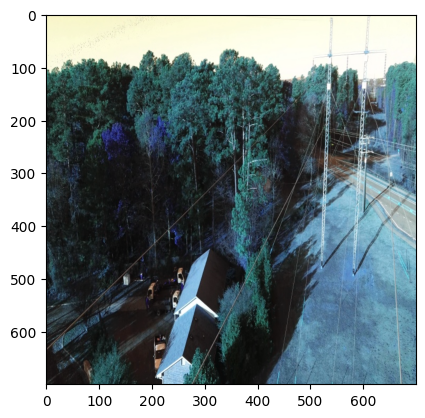

In [10]:
# Carico l'immagine dal  dataset
image_path = "/content/dataset/trainingset/07_1035.jpg"
im = cv2.imread(image_path)
#print(im)
plt.imshow(im)
#cv2.imshow(im)


Detectron2

[01/13 15:08:30 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 163MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


tensor([2, 9], device='cuda:0')
Boxes(tensor([[190.0954, 504.6909, 255.4584, 569.7114],
        [234.4312, 411.9260, 245.2087, 442.5301]], device='cuda:0'))


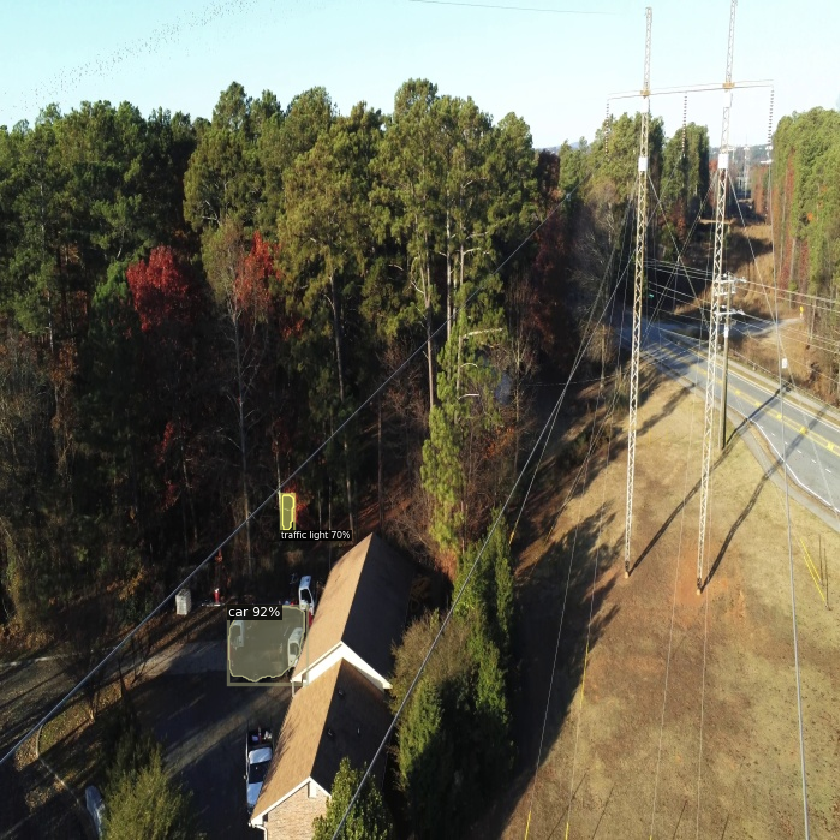

In [11]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])# We can use `Visualizer` to draw the predictions on the image.


Mi faccio stampare le predizioni sull immagini

In [12]:
print(outputs['instances'].pred_classes)
print(outputs['instances'].pred_boxes)
#print(outputs['instances'].pred_classes)
# Visualizza la mappatura delle classi
print(cfg.MODEL.ROI_HEADS.NUM_CLASSES)
print(cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST)
# Se hai un nome associato a ciascun ID di classe, puoi accedere a esso nel seguente modo
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
print(metadata.thing_classes)


tensor([2, 9], device='cuda:0')
Boxes(tensor([[190.0954, 504.6909, 255.4584, 569.7114],
        [234.4312, 411.9260, 245.2087, 442.5301]], device='cuda:0'))
80
0.4
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'h

Le etichette non rispecchiano i miei dati perciò modifico con le mie etichette

In [13]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train", {}, "/content/dataset/trainingset/tra.json", "/content/dataset/trainingset/")
from detectron2.data.datasets import register_coco_instances
register_coco_instances("val", {}, "/content/dataset/validationset/val.json", "/content/dataset/validationset/")
register_coco_instances("test", {}, "/content/dataset/testset/test.json", "/content/dataset/testset/")



In [14]:
train_metadata = MetadataCatalog.get("train")
train_dataset_dicts = DatasetCatalog.get("train")
val_metadata = MetadataCatalog.get("val")
val_dataset_dicts = DatasetCatalog.get("val")
test_metadata = MetadataCatalog.get("test")
test_dataset_dicts = DatasetCatalog.get("test")

WARNING [01/13 15:08:36 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/13 15:08:36 d2.data.datasets.coco]: Loaded 673 images in COCO format from /content/dataset/trainingset/tra.json
WARNING [01/13 15:08:36 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/13 15:08:36 d2.data.datasets.coco]: Loaded 169 images in COCO format from /content/dataset/validationset/val.json
WARNING [01/13 15:08:36 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/13 15:08:36 d2.data.datasets.coco]: Loaded 400 images in COCO format from /content/dataset/testset/test.json


Faccio stampare qualche immagine con le sue annotazioni

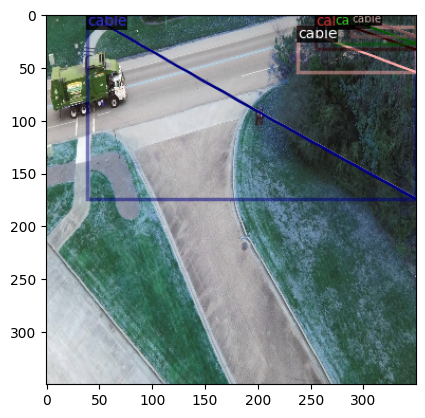

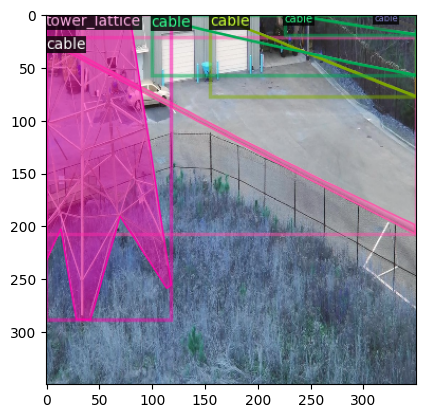

File: /content/dataset/trainingset/70_01510.jpg
Annotations: [{'iscrowd': 0, 'bbox': [0.0, 438.0, 310.0, 261.0], 'category_id': 0, 'segmentation': [[0.0, 443.3333333333333, 17.23484848484848, 459.006734006734, 38.405137540453076, 476.0427903631787, 58.99621212121212, 493.77104377104376, 84.24352750809061, 514.742898238044, 104.57465277777779, 531.5895061728395, 127.25020226537218, 551.5551959726716, 149.90392394822007, 569.8040273282992, 172.55764563106797, 588.9967637540453, 193.61852750809064, 605.9870550161811, 211.13976537216826, 620.460266091334, 229.54591423948216, 636.1920172599783, 250.96076051779937, 653.8115785688601, 280.81597222222223, 678.2407407407409, 305.703125, 699.6759259259259, 310.24979773462786, 698.804386911183, 290.7986111111111, 679.0123456790124, 264.4114077669903, 660.7335490830636, 243.35052588996763, 642.799352750809, 220.51982200647248, 623.6066163250629, 204.41444174757282, 610.3919453434016, 181.22977346278316, 591.5138439410284, 163.17758899676375, 576.0

In [15]:
from matplotlib import pyplot as plt
# Visualize some random samples
for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    if img is not None:
        visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
        vis = visualizer.draw_dataset_dict(d)
        plt.imshow(vis.get_image()[:, :, ::-1])
        plt.show()
    else:
        print(f"Image not loaded for file: {d.get('file_name', 'N/A')}")

for d in random.sample(train_dataset_dicts, 2):
    print(f"File: {d['file_name']}")
    print("Annotations:", d.get("annotations", "No annotations"))
    print("\n---\n")





Addestro il modello

In [117]:
import os
import random
import numpy as np
import torch
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
#se si vuole la massima riproducibilità decommetnare questo e commentare quello sotto, non l ho fatto poichè  si disabilitano ottimizzazioni GPU
#si calcola una funzione di hash per mantenere constante il seed ecc che provocano un aumento del tempo necessiario per addrestrare la rete di circa 10 volte
#seed = 42
#def seed_everything(seed):
     #random.seed(seed)
     #os.environ['PYTHONHASHSEED'] = str(seed)
     #np.random.seed(seed)
    #torch.manual_seed(seed)
    #torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
    #torch.backends.cudnn.benchmark = True
#seed_everything(seed)

# Fissa il seed per i generatori di numeri casuali per rendere l'addestramento riproducibile
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True#si garantisce che le stesse operazioni casuali o pseudo-casuali restituiscano sempre gli stessi risultati

# Configurazione di Detectron2
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content"
cfg.DATALOADER.ASPECT_RATIO_GROUPING = True  #raggruppa nel natch immagini simili
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0, 2.5]]  #rapporto ancor box
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2#40 immagini in parallelo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 10# numero di immagini per batch
cfg.SOLVER.BASE_LR = 0.025 # tasso di apprendimento
cfg.SOLVER.MAX_ITER = 3600
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512  #dimensione ROI
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[1, 32], [1, 64], [1, 128], [1, 256], [1, 512]] #dimensioni ancor box
cfg.SOLVER.GAMMA = 0.1  #fattore di riduzione del tasso di apprendimenti
#cfg.MODEL.RESNETS.STRIDE_IN_1X1 = True
#cfg.MODEL.RESNETS.NUM_GROUPS = 32  # Aumenta il numero di gruppi
#cfg.MODEL.RESNETS.WIDTH_PER_GROUP = 4  # Aumenta la larghezza per gruppo
#cfg.MODEL.RESNETS.RES2_OUT_CHANNELS = 256
#cfg.MODEL.RESNETS.STEM_OUT_CHANNELS = 64

#num_epochs = max_iter / (num_images / ims_per_batch)
#cfg.MODEL.FCOS = True
#cfg.MODEL.META_ARCHITECTURE = "FCOS"

cfg.INPUT.AUGMENTATIONS = [
    ("Flip", {"max":0.5,"start_after_iteration": 200}),
    ("RandomBrightness", {"intensity_min": 0.6, "intensity_max": 1.4,"start_after_iteration": 300}),  # Aggiungi range di intensità
    ("RandomContrast", {"intensity_min": 0.6, "intensity_max": 1.4,"start_after_iteration": 500}),  # Aggiungi range di intensità
    ("RandomRotation", {"angle": [-10.0, 10.0],"start_after_iteration": 700}),  # Riduci l'intervallo di rotazione
    ("RandomZoom", {"min_zoom": 0.8, "max_zoom": 1.3,"start_after_iteration": 1000}),  # Riduci l'intervallo di zoom
    ("RandomNoise", {"mean": 0.0, "std": 0.01, "probability": 0.5,"start_after_iteration": 1200}),  # Aggiungi rumore gaussiano
    ("ColorJitter", {"brightness": 0.1, "contrast": 0.1, "saturation": 0.1, "hue": 0.1,"start_after_iteration": 1400}),
    ("RandomBlur", {"sigma_min": 0.0, "sigma_max": 1.5,"start_after_iteration": 1600}),
    ("RandomSharpness", {"min_sharpness": 0.5, "max_sharpness": 2.0, "start_after_iteration": 1800}),
    ("RandomAffine", {"scale": (0.8, 1.2), "shear": (-10, 10), "start_after_iteration": 1900}),
    #("RandomSolarize", {"threshold": 208, "start_after_iteration": 2000}),#sposta i pixel sopra una certa soglia
    ("EnhanceLines", {"start_after_iteration": 2100}),
    ("RandomHoughLines", {"theta_res": 1, "rho_res": 1, "threshold": 50, "line_length": 10, "line_gap": 5, "start_after_iteration": 2200}),
    ("RandomLineShadow", {"shadow_intensity": 0.5, "start_after_iteration": 2300}),



]
# Creazione della directory di output se non esiste
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# Creazione dell'istanza di DefaultTrainer con la configurazione fornita
trainer = DefaultTrainer(cfg)
# Caricamento di un modello preaddestrato se disponibile, altrimenti inizia l'addestramento da zero
trainer.resume_or_load(resume=True)

[01/13 18:26:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Avvio il train

In [118]:
trainer.train()

[01/13 18:26:10 d2.engine.train_loop]: Starting training from iteration 3500
[01/13 18:27:05 d2.utils.events]:  eta: 0:03:40  iter: 3519  total_loss: 0.4159  loss_cls: 0.04525  loss_box_reg: 0.1198  loss_mask: 0.06876  loss_rpn_cls: 0.008818  loss_rpn_loc: 0.1682    time: 2.7617  last_time: 2.9314  data_time: 0.2300  last_data_time: 0.2200   lr: 0.025  max_mem: 9768M
[01/13 18:27:58 d2.utils.events]:  eta: 0:02:44  iter: 3539  total_loss: 0.3691  loss_cls: 0.04095  loss_box_reg: 0.118  loss_mask: 0.0655  loss_rpn_cls: 0.008674  loss_rpn_loc: 0.1391    time: 2.7177  last_time: 2.7580  data_time: 0.2324  last_data_time: 0.1707   lr: 0.025  max_mem: 9768M
[01/13 18:28:54 d2.utils.events]:  eta: 0:01:49  iter: 3559  total_loss: 0.4309  loss_cls: 0.04755  loss_box_reg: 0.1245  loss_mask: 0.06556  loss_rpn_cls: 0.01109  loss_rpn_loc: 0.1619    time: 2.7330  last_time: 2.8369  data_time: 0.2162  last_data_time: 0.3794   lr: 0.025  max_mem: 9768M
[01/13 18:29:49 d2.utils.events]:  eta: 0:00:54

In [119]:
import yaml
# Save the configuration to a config.yaml file

config_yaml_path = "/content/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

In [120]:
#salvataggio pesi
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
cfg.SEED = 42
predictor = DefaultPredictor(cfg)

[01/13 18:30:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/model_final.pth ...


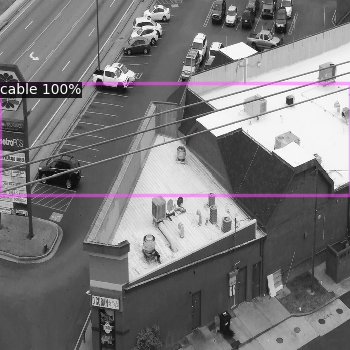

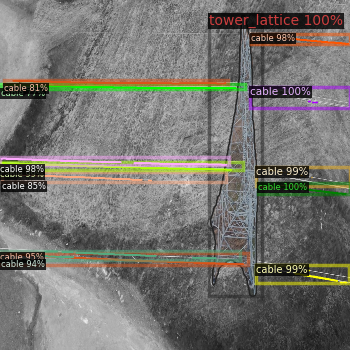

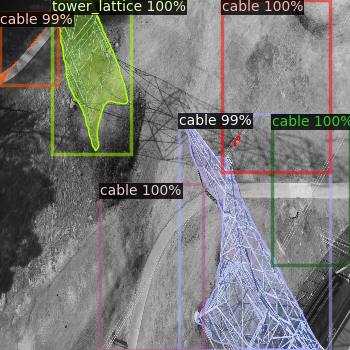

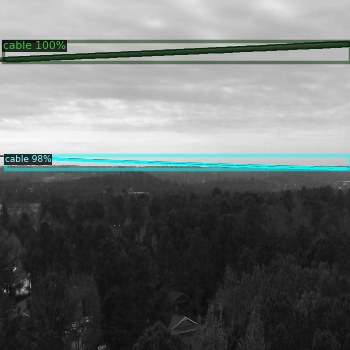

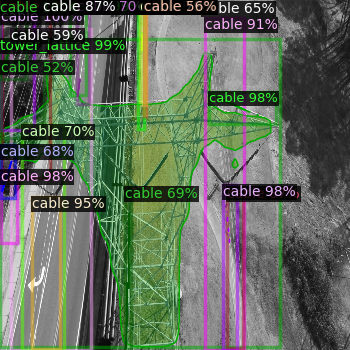

In [121]:
from detectron2.utils.visualizer import ColorMode
for d in random.sample(val_dataset_dicts, 5):    #select number of images for display
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [122]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[01/13 18:31:01 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [01/13 18:31:01 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/13 18:31:01 d2.data.datasets.coco]: Loaded 169 images in COCO format from /content/dataset/validationset/val.json
[01/13 18:31:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/13 18:31:01 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/13 18:31:01 d2.data.common]: Serializing 169 elements to byte tensors and concatenating them all ...
[01/13 18:31:01 d2.data.common]: Serialized dataset takes 0.61 MiB
[01/13 18:31:01 d2.evaluation.evaluator]: Start inference on 169 batches
[01/13 18:31:03 d2.evaluation.evaluator]: Inference done 11/169. Dataloading: 0.0017 s/it

In [123]:
#from detectron2.data.datasets import register_coco_instances
#register_coco_instances("test", {}, "/content/dataset/testset/test.json", "/content/dataset/testset/")
evaluator = COCOEvaluator("test", output_dir="./output")
test_loader = build_detection_test_loader(cfg, "test")
predictions = inference_on_dataset(predictor.model, test_loader, evaluator)

[01/13 18:31:21 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [01/13 18:31:22 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/13 18:31:22 d2.data.datasets.coco]: Loaded 400 images in COCO format from /content/dataset/testset/test.json
[01/13 18:31:22 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/13 18:31:22 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/13 18:31:22 d2.data.common]: Serializing 400 elements to byte tensors and concatenating them all ...
[01/13 18:31:22 d2.data.common]: Serialized dataset takes 1.38 MiB
[01/13 18:31:22 d2.evaluation.evaluator]: Start inference on 400 batches
[01/13 18:31:23 d2.evaluation.evaluator]: Inference done 11/400. Dataloading: 0.0015 s/iter. I

In [124]:
import pycocotools.mask as mask_util

result = []
for image_data in test_dataset_dicts:
    # Carica l'immagine dal set di dati
    image = cv2.imread(image_data["file_name"])

    # Esegui la predizione
    outputs = predictor(image)

    # Estrai le informazioni rilevanti dalle predizioni
    instances = outputs["instances"]
    boxes = instances.pred_boxes.tensor.cpu().numpy()
    scores = instances.scores.cpu().numpy()
    classes = instances.pred_classes.cpu().numpy()
    masks = instances.pred_masks.cpu().numpy()
    for i in range(masks.shape[0]):
        image_id = image_data['image_id']  # Corrected line
        # box defined as (x1, y1, x2, y2)
        bbox = boxes[i]
        bbox = [bbox[0], bbox[1], bbox[2]-bbox[0], bbox[3]-bbox[1]]
        # Round to the nearest 10th to avoid huge file sizes, as COCO suggests
        bbox = [round(float(x)*10)/10 for x in bbox]

        rle =mask_util.encode(np.asfortranarray(masks[i].astype(np.uint8)))
        rle['counts'] = rle['counts'].decode('ascii')  # json.dump doesn't like bytes strings

        result.append({
            'image_id': int(image_id),
            'category_id': int(classes[i]),
            'bbox': bbox,
            'segmentation': rle,
            'score': float(scores[i])
        })


# save file
with open('pred.json', 'w') as fp:
    json.dump(result, fp)

